# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:https://www.kaggle.com/datasets/keremkurt/diversity-equity-and-inclusion-measures-dataset

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from scipy.stats import pearsonr

df = pd.read_csv('/Users/Liz/Desktop/Women +/Assignment 4/cleaning-data-checkpoint3/4Clean.csv')
df.info(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  10000 non-null  int64 
 1   Name                10000 non-null  object
 2   Surname             10000 non-null  object
 3   Division            10000 non-null  object
 4   Manager             10000 non-null  object
 5   Gender              10000 non-null  object
 6   Sexual_Orientation  10000 non-null  object
 7   LGBTQ               10000 non-null  object
 8   Indigenous          10000 non-null  object
 9   Ethnicity           10000 non-null  object
 10  Disability          10000 non-null  object
 11  Minority            10000 non-null  object
 12  Veteran             10000 non-null  object
 13  Date of Birth       10000 non-null  object
 14  Age                 10000 non-null  int64 
 15  Preferred Name      10000 non-null  object
 16  Nationality         100

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

In [3]:
# from IPython.display import Image
# import seaborn as sns
# import matplotlib.pyplot as plt 

# sns_plot = sns.pairplot(df, height=2.0)
# sns_plot.savefig("pairplot.png")

# plt.clf()
# Image(filename='pairplot.png')

# from IPython.display import Image
# import seaborn as sns
# import matplotlib.pyplot as plt 

# sns_plot = sns.pairplot(df.sample(10), hue='Division', height=2.0)
# sns_plot.savefig("pairplot.png")

# plt.clf()
# Image(filename='pairplot.png')

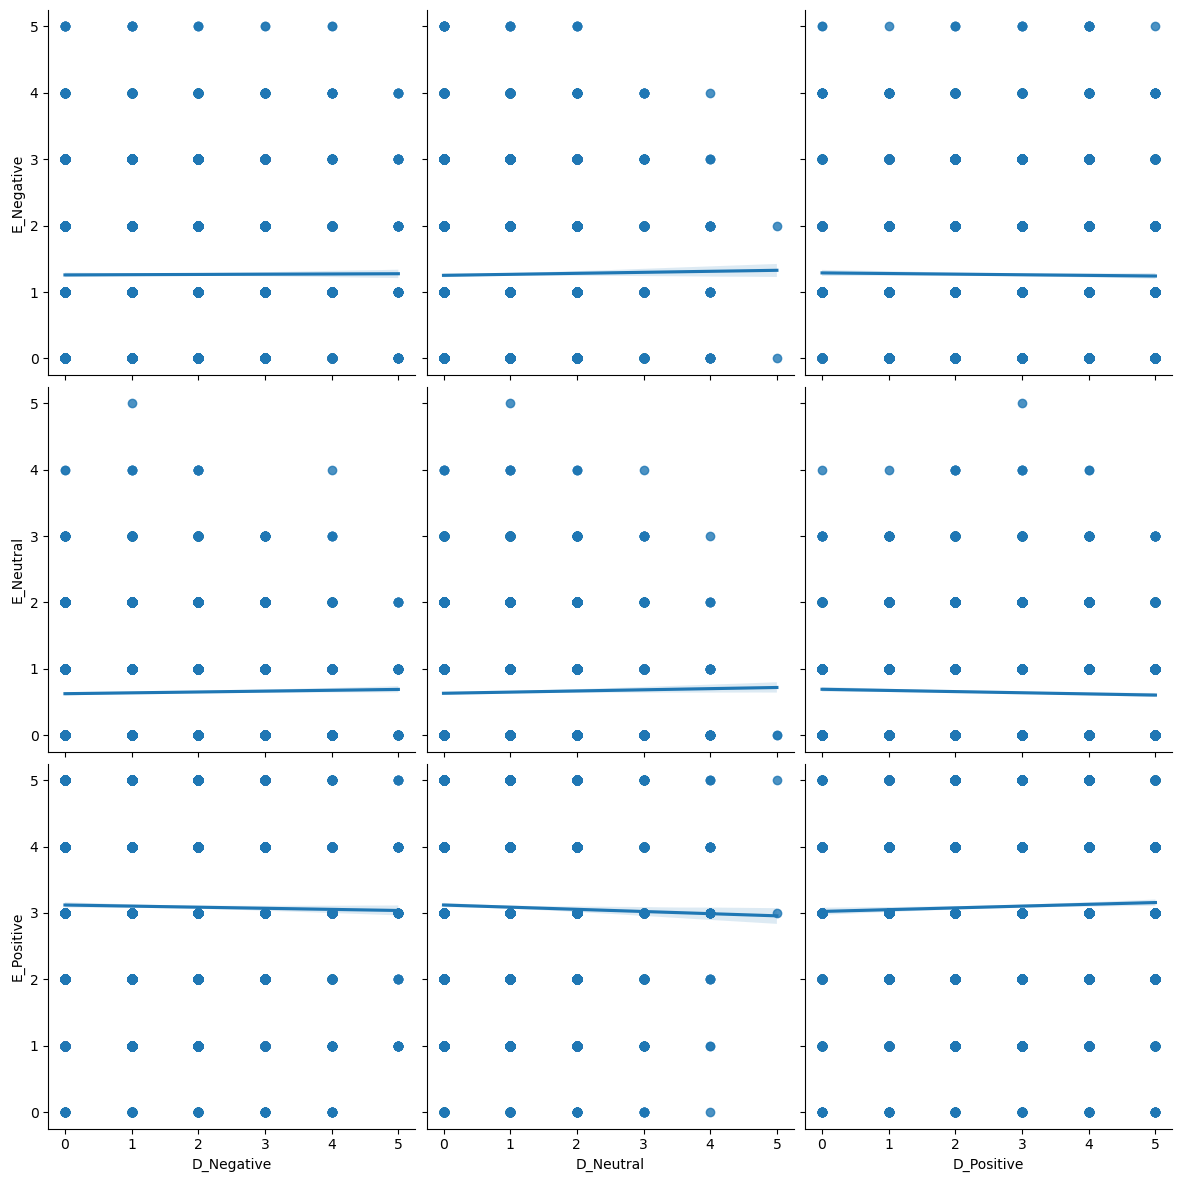

In [4]:


# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=['D_Negative', 'D_Neutral','D_Positive'], 
             y_vars=['E_Negative','E_Neutral','E_Positive'], height=4, aspect=1, kind='reg')
plt.show()

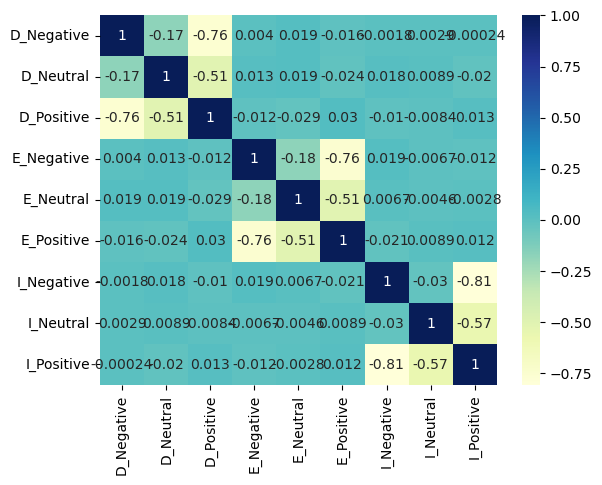

In [5]:
dfheat1=df.drop(['Id', 'Age', 'Aug_D_Q1','Aug_D_Q2','Aug_D_Q3','Aug_D_Q4','Aug_D_Q5',
                'Aug_E_Q1','Aug_E_Q2','Aug_E_Q3','Aug_E_Q4','Aug_E_Q5',
                'Aug_I_Q1','Aug_I_Q2','Aug_I_Q3','Aug_I_Q4','Aug_I_Q5'], axis=1)

sns.heatmap(dfheat1.corr(), cmap="YlGnBu", annot = True)
plt.show()

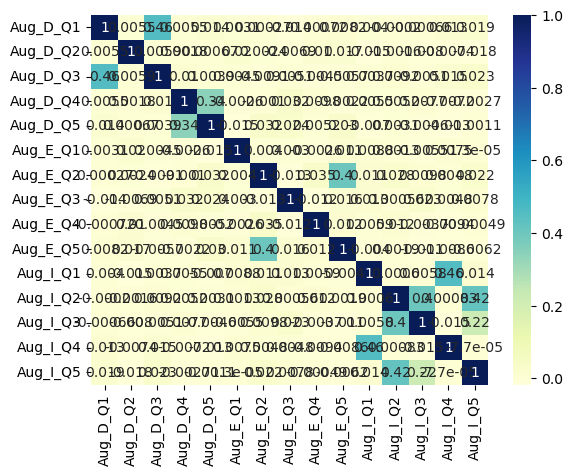

In [6]:
dfheat2=df.drop(['Id', 'Age', 'D_Negative','D_Neutral','D_Positive',
                 'E_Negative','E_Neutral','E_Positive',
                 'I_Negative','I_Neutral','I_Positive'], axis=1)

sns.heatmap(dfheat2.corr(), cmap="YlGnBu", annot = True)
plt.show()

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

In [8]:
dfheat2=df.drop(['Id', 'Age', 'D_Negative','D_Neutral','D_Positive',
                 'E_Negative','E_Neutral','E_Positive',
                 'I_Negative','I_Neutral','I_Positive'], axis=1)

X = dfheat2['Aug_I_Q1']
y = dfheat2['Aug_I_Q4']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                    test_size= .03, random_state= 100)
X_train
y_train

4916   -2
4370    2
8767   -2
2334   -2
7330    2
       ..
7933   -2
4791    1
3008    1
4311   -2
1396   -1
Name: Aug_I_Q4, Length: 7000, dtype: int64

In [11]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

lr.params

const       0.075846
Aug_I_Q1    0.457324
dtype: float64

In [12]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Aug_I_Q4   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     1860.
Date:                Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:42:58   Log-Likelihood:                -11544.
No. Observations:                7000   AIC:                         2.309e+04
Df Residuals:                    6998   BIC:                         2.310e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0758      0.015      5.040      0.000       0.046       0.105
Aug_I_Q1       0.4573      0.011     43.133      0.000       0.437       0.478
==============================================================================
Omnibus:                      165.374   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.607
Skew:                          -0.136   Prob(JB):                     3.87e-22
Kurtosis:                       2.486   Cond. No.                         1.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

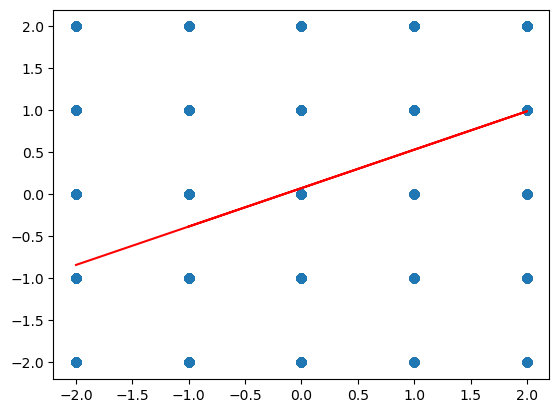

In [13]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 0.0758 + 0.4573*X_train, 'r')
plt.show()

## Error Terms

Finally, plot your error terms!

In [14]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train-y_train_pred)

/Users/Liz/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


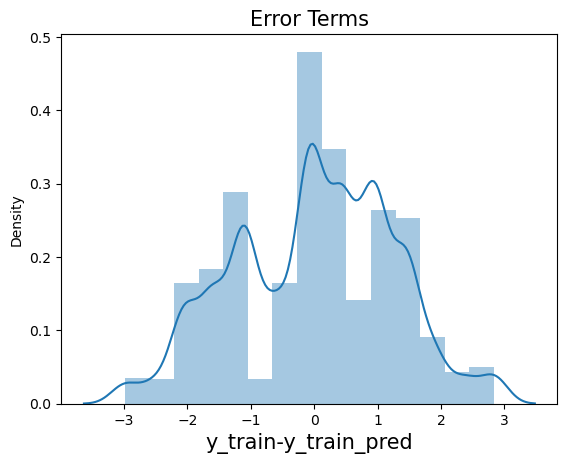

In [15]:
fig=plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train-y_train_pred', fontsize = 15)
plt.show()

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 
   0.210
   
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset? 

Unfortunately, much of what makes my dataset helpful to the company is not in the right data form (interger) to have helpful results with a linear regression model. I do believe that if I were to go in and recode some columns, for example to give each department a number vs a string name, I might be able to find more helpful predicitive indicators. 

3. Was your plot of the error terms a bell curve? 

Almost! As stated above, I struggled to find correlations with categories in the right data format. When looking at two columns with some correlation, you can see that I do not have a bell curve on the left side, as there is a large dip. I do have the general idea of a bell curve as my high point is in the center and the data trends downward in a predictable way on the right side. 